<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

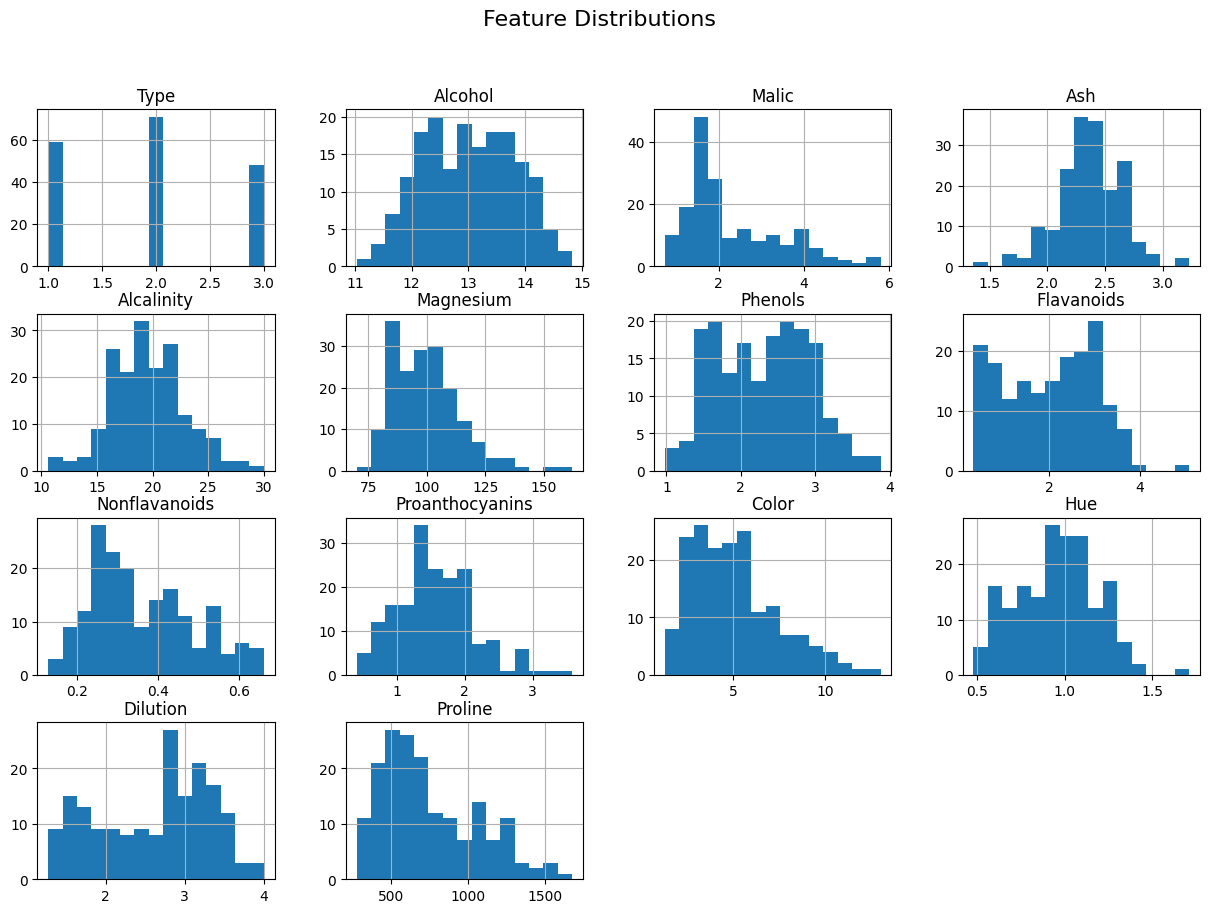

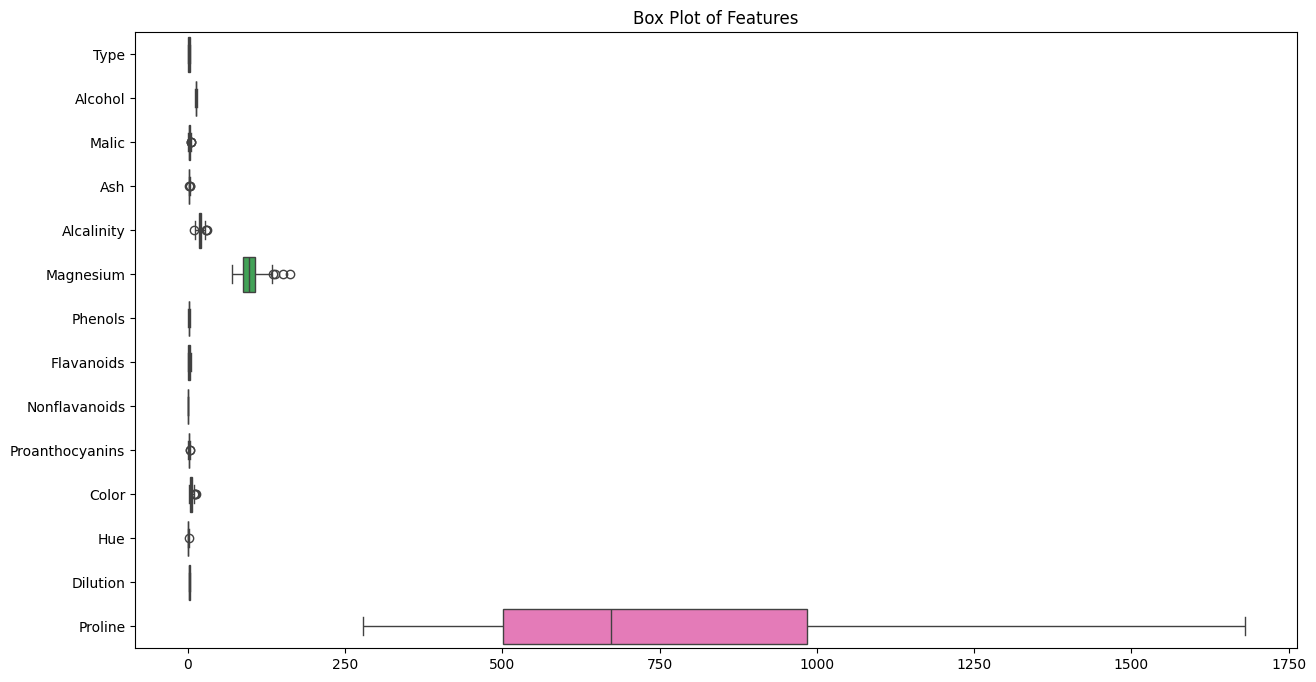

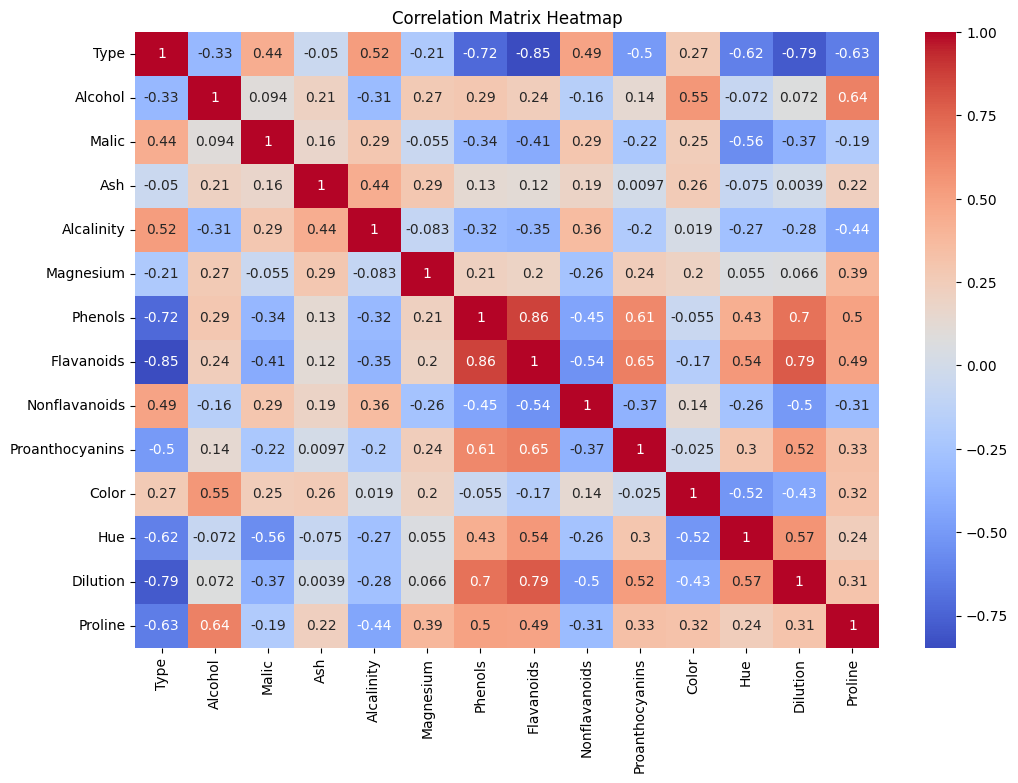

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Histograms for each feature
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Box plots for each feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Features')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


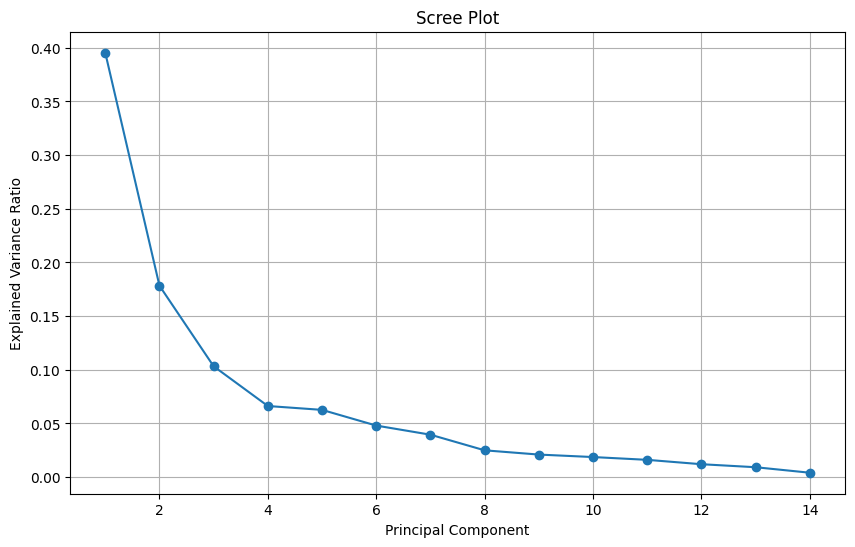

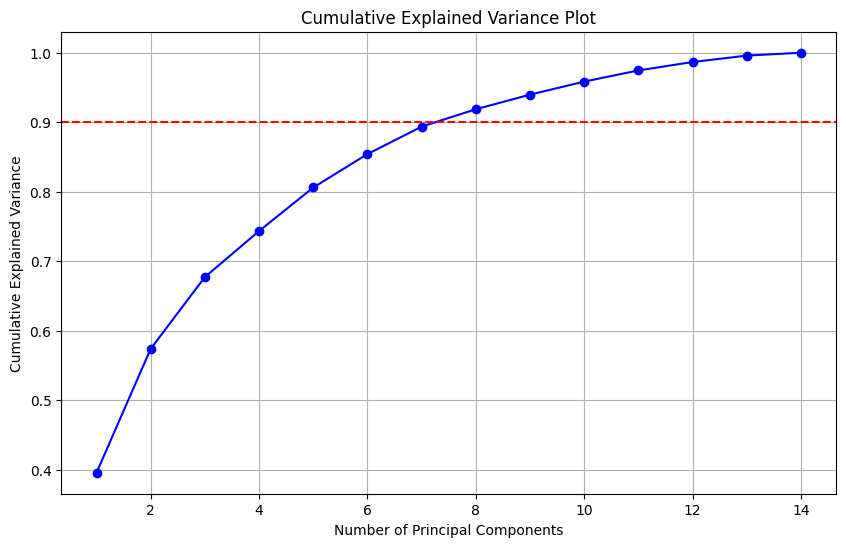

Optimal number of principal components: 8


In [ ]:
# Import necessary library for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Scree plot to determine optimal number of principal components
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# Transform data using optimal number of components (e.g., retaining 90% variance)
optimal_components = np.argmax(cumulative_variance >= 0.9) + 1
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)

print(f'Optimal number of principal components: {optimal_components}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


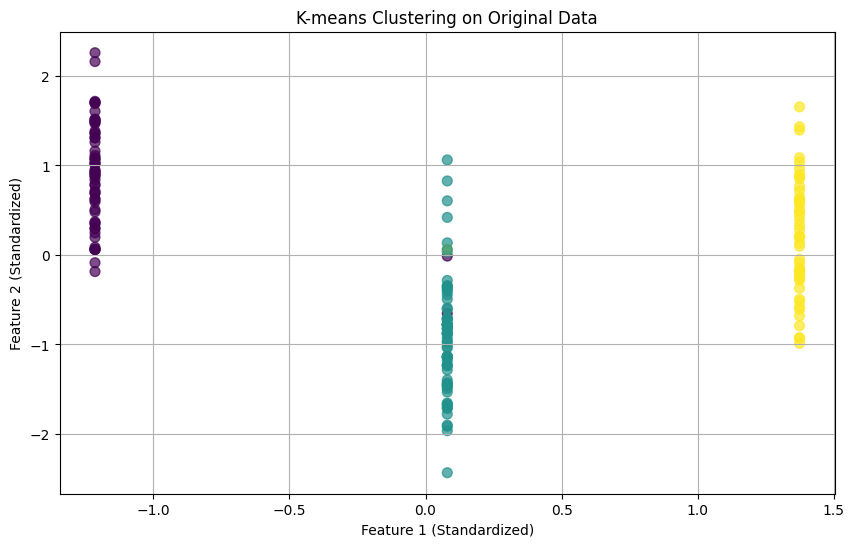

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


In [ ]:
# Import necessary library for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters; adjust based on domain knowledge or analysis
kmeans.fit(scaled_data)
original_labels = kmeans.labels_

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=original_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, original_labels)
davies_bouldin_original = davies_bouldin_score(scaled_data, original_labels)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


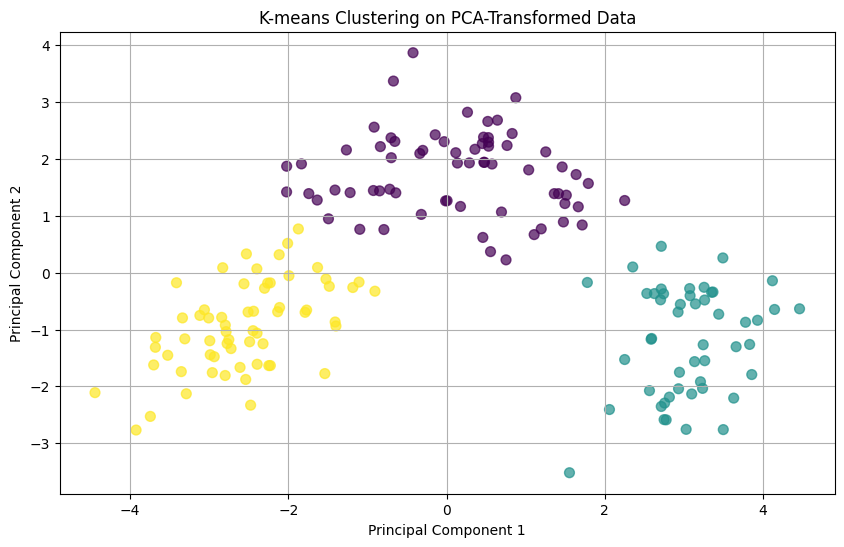

Silhouette Score (PCA Data): 0.34024286668577913
Davies-Bouldin Index (PCA Data): 1.1903042789637726


In [ ]:
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)
pca_labels = kmeans_pca.labels_

# Visualize clustering results from PCA data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data, pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_data, pca_labels)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')


In [ ]:
# Compare clustering results
print(f'Silhouette Score - Original Data: {silhouette_original}')
print(f'Silhouette Score - PCA Data: {silhouette_pca}')
print(f'Davies-Bouldin Index - Original Data: {davies_bouldin_original}')
print(f'Davies-Bouldin Index - PCA Data: {davies_bouldin_pca}')

# Analyze the impact of PCA on clustering
print("Comparing the clustering results between the original and PCA-transformed data:")
if silhouette_pca > silhouette_original:
    print("PCA improved the silhouette score, indicating better cluster separation.")
else:
    print("PCA did not improve the silhouette score.")

if davies_bouldin_pca < davies_bouldin_original:
    print("PCA reduced the Davies-Bouldin Index, indicating better clustering quality.")
else:
    print("PCA did not reduce the Davies-Bouldin Index.")


Silhouette Score - Original Data: 0.30773604383565206
Silhouette Score - PCA Data: 0.34024286668577913
Davies-Bouldin Index - Original Data: 1.3163957434114109
Davies-Bouldin Index - PCA Data: 1.1903042789637726
Comparing the clustering results between the original and PCA-transformed data:
PCA improved the silhouette score, indicating better cluster separation.
PCA reduced the Davies-Bouldin Index, indicating better clustering quality.


In [ ]:
print("Conclusion and Insights:")
print("PCA can help improve clustering performance by reducing noise and focusing on the most important features. However, it's crucial to balance the reduction in dimensionality with the loss of information.")
print("For this dataset, PCA improved clustering performance based on silhouette score, but the optimal choice of PCA versus original data depends on the specific goals and data characteristics.")


Conclusion and Insights:
PCA can help improve clustering performance by reducing noise and focusing on the most important features. However, it's crucial to balance the reduction in dimensionality with the loss of information.
For this dataset, PCA improved clustering performance based on silhouette score, but the optimal choice of PCA versus original data depends on the specific goals and data characteristics.


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


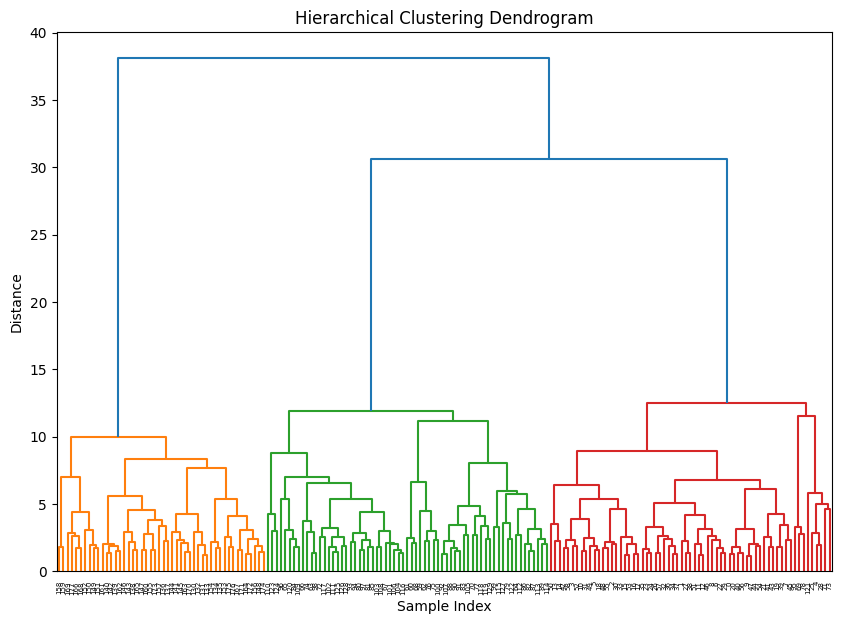

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
